In [2]:
# Importing all libraries.
from pylab import *
from netCDF4 import Dataset
%matplotlib inline
import os
import cmocean as cm
from trackeddy.tracking import *
from trackeddy.datastruct import *
from trackeddy.geometryfunc import *
from trackeddy.init import *
from trackeddy.physics import *
from trackeddy.plotfunc import *


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import cmocean as cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


#import cosima_cookbook as cc

(0.0, 100.0, 0.0, 100.0)

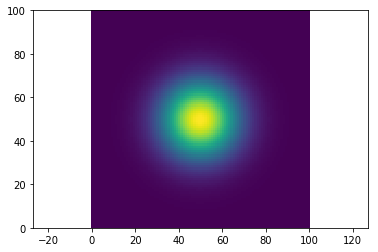

In [3]:
x=linspace(-2,2,100)
y=linspace(-2,2,100)
X,Y=np.meshgrid(x,y)
amplitude=1
xo=0
yo=0
coords=[X,Y,amplitude,xo,yo]

sigma_x=0.5
sigma_y=0.5
theta=pi/2
gaussian=twoD_Gaussian(coords, sigma_x, sigma_y, theta, slopex=0, slopey=0, offset=0)
pcolormesh(gaussian.reshape(100,100))
plt.axis('equal')

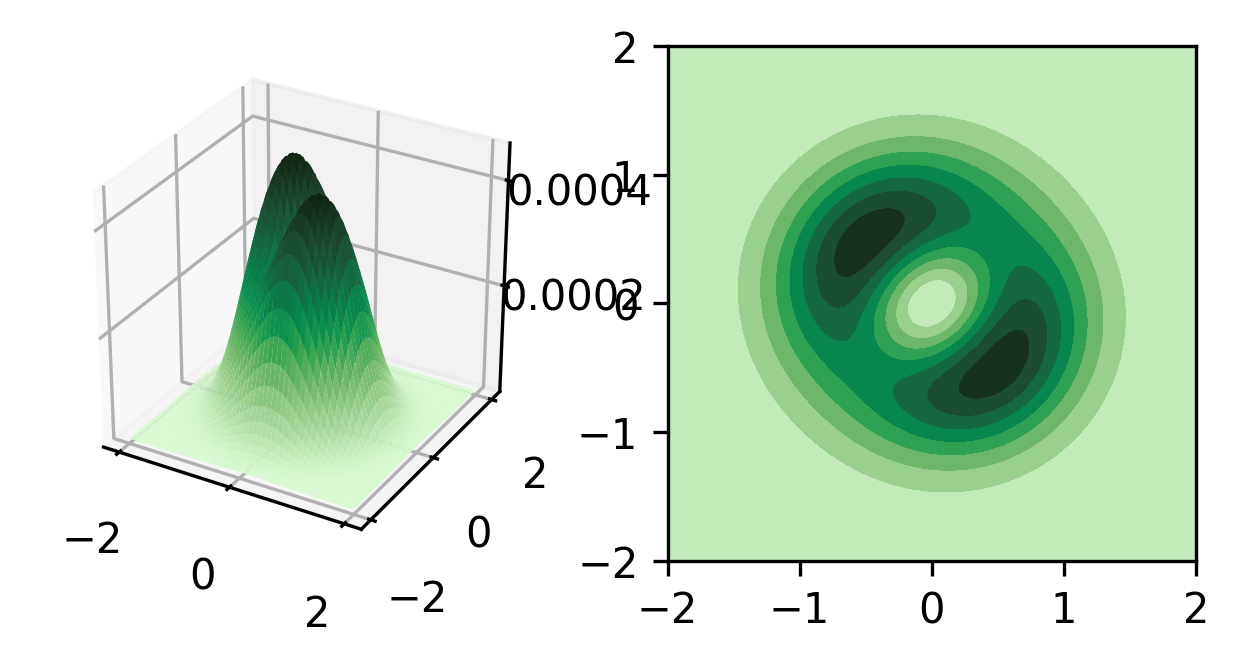

In [4]:
a=0.002
b=0.002
c=0.001
x0=0
y0=0
Z=-1*(a*(X-x0)**2-1*c*(X-x0)*(Y-y0)+b*(Y-y0)**2)*-gaussian.reshape(100,100)

fig = plt.figure(figsize=(5,5),dpi=300)
ax = fig.add_subplot(2,2,1, projection='3d')
ax.plot_surface(X,Y,Z,cmap=cm.cm.algae)
ax1 = fig.add_subplot(2,2,2)
ax1=contourf(X,Y,Z,cmap=cm.cm.algae)

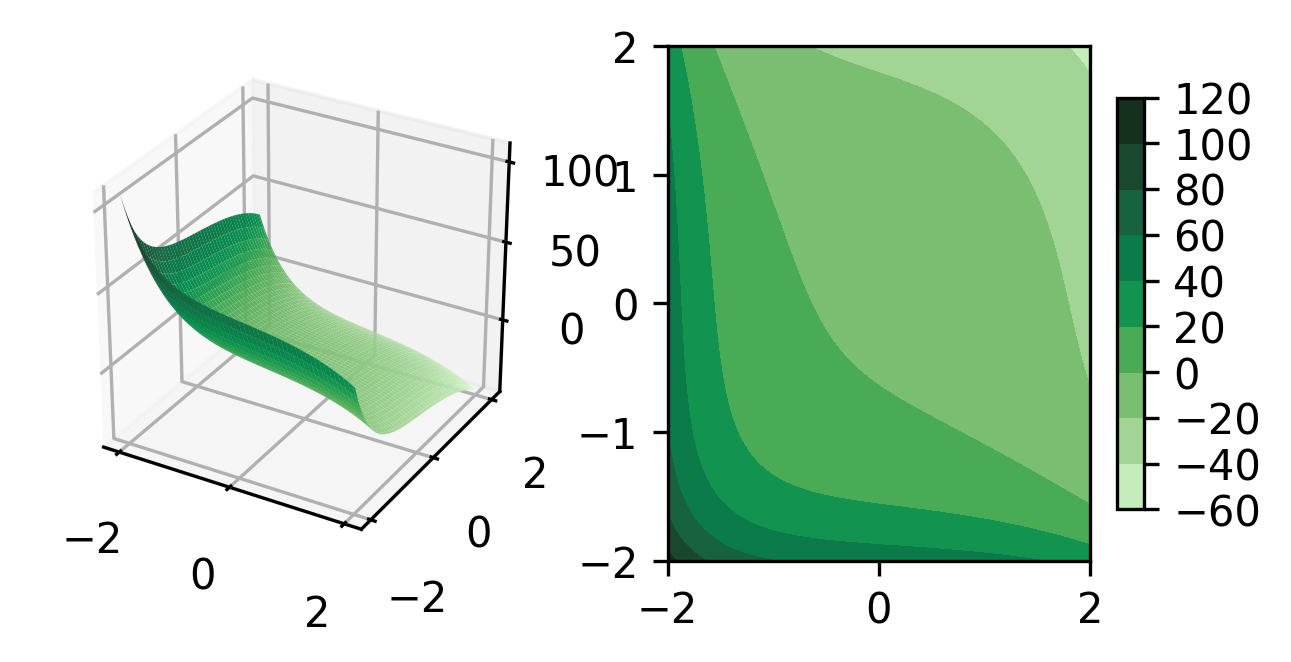

In [5]:
a=0.002
b=0.002
c=0.001
x0=0
y0=0

aa=3
bb=-2

Z=-1*((aa*(e**X))-(e**(bb*X))+(aa*(e**Y))-(e**(bb*Y)))#*-gaussian.reshape(100,100)

fig = plt.figure(figsize=(5,5),dpi=300)
ax = fig.add_subplot(2,2,1, projection='3d')
ax.plot_surface(X,Y,Z,cmap=cm.cm.algae)
ax1 = fig.add_subplot(2,2,2)
contour=contourf(X,Y,Z,cmap=cm.cm.algae)
fig.colorbar(contour, shrink=0.8, aspect=15)

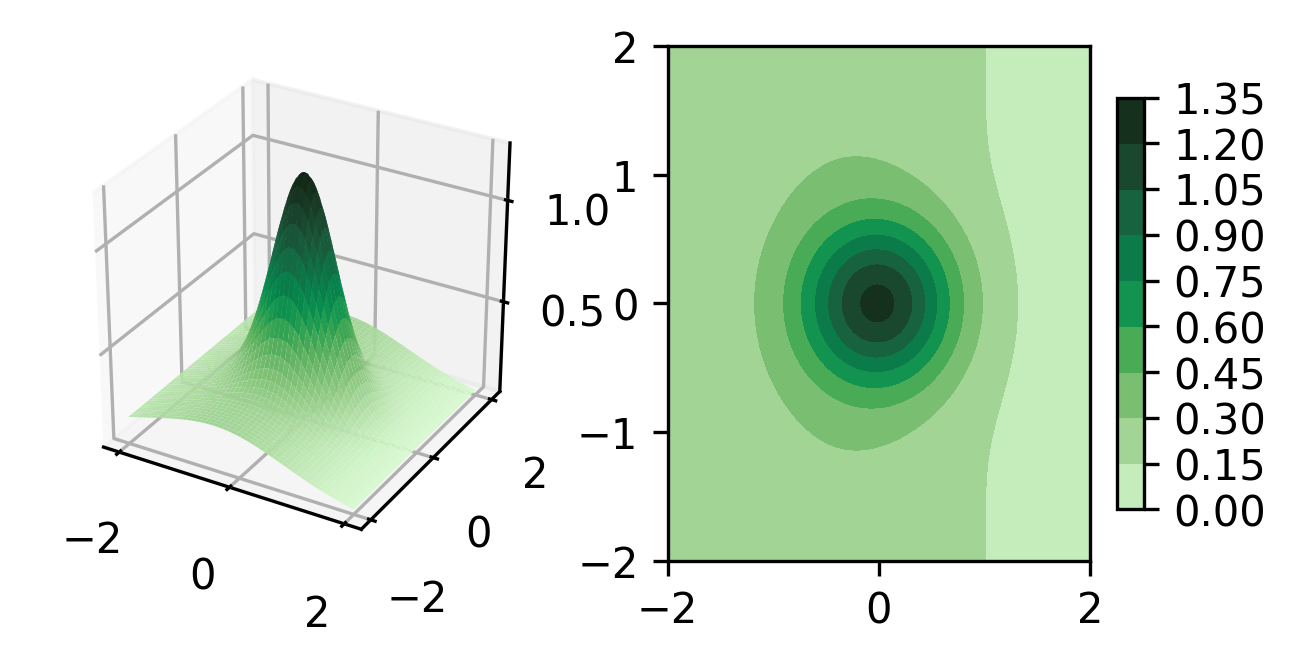

In [6]:
a=0.5
b=2
c=0.5
d=1
x0=0
y0=0

aa=3
bb=-2

Z=a/(e**X+e**(-c*X)) + b/(e**Y+e**(-d*Y))*gaussian.reshape(100,100)

fig = plt.figure(figsize=(5,5),dpi=300)
ax = fig.add_subplot(2,2,1, projection='3d')
ax.plot_surface(X,Y,Z,cmap=cm.cm.algae)
ax1 = fig.add_subplot(2,2,2)
contour=contourf(X,Y,Z,cmap=cm.cm.algae)
fig.colorbar(contour, shrink=0.8, aspect=15)

In [7]:
def twoD_Paraboloid(coords, amplitude, xo, yo, a, b,offset):
    '''
    *************** twoD_Gaussian *******************
    Build a 2D gaussian.
    Notes:
        Remmember to do g.ravel().reshape(len(x),len(y)) for plotting purposes. 
    Args:
        coords [x,y] (list|array): Coordinates in x and y.
        amplitude (float): Amplitud of gaussian.
        x0 , yo (float): Center of Gausian.
        sigma_x,sigma_y (float): Deviation.
        theta (Float): Orientation.
        offset (Float): Gaussian Offset.
    Returns:
        g.ravel() (list|array) - Gaussian surface in a list.
    Usage:
        Check scan_eddym function.
    '''
    x=coords[0]
    y=coords[1]
    xo = float(xo)
    yo = float(yo)
    
    #a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    #b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    #c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    
    #g =offset - amplitude * (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) + c*((y-yo)**2))
    
    #g = 1 * (((x-xo)**2/a**2) + ((y-yo)**2/b**2))
    g = -amplitude*(((x-x0)/a)**2+((y-y0)/b)**2) + offset
    
    return g.ravel()


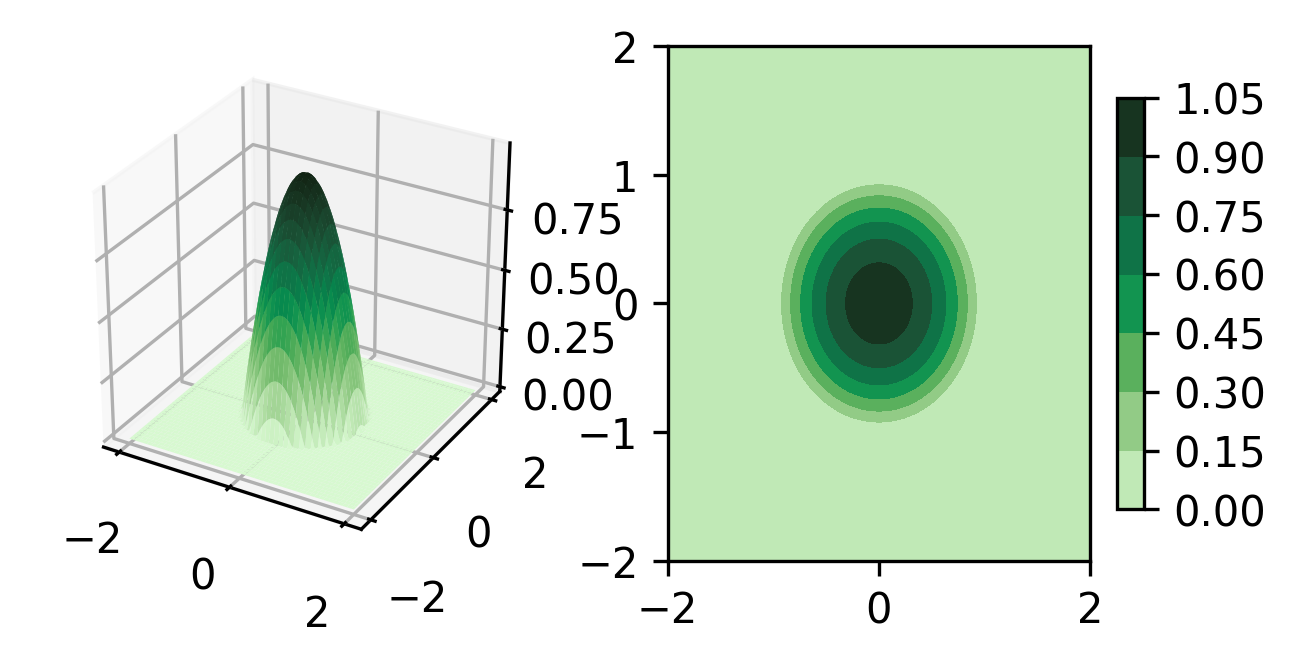

In [39]:
x=linspace(-2,2,100)
y=linspace(-2,2,100)
X,Y=np.meshgrid(x,y)
coords=[X,Y]
amplitude=1
xo=0
yo=0
sigma_x=1
sigma_y=1
offset=1
paraboloid=twoD_Paraboloid(coords, amplitude, xo, yo, sigma_x, sigma_y,offset)

paraboloid[paraboloid<0]=0


fig = plt.figure(figsize=(5,5),dpi=300)
ax = fig.add_subplot(2,2,1, projection='3d')
ax.plot_surface(X,Y,paraboloid.reshape(100,100),cmap=cm.cm.algae)
ax1 = fig.add_subplot(2,2,2)
contour=contourf(X,Y,paraboloid.reshape(100,100),cmap=cm.cm.algae)
fig.colorbar(contour, shrink=0.8, aspect=15)

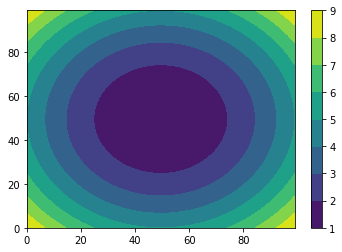

In [9]:
#var=a/(e**X+e**(-c*X)) + b/(e**Y+e**(-d*Y))*gaussian.reshape(100,100)
var=twoD_Paraboloid(coords, amplitude, xo, yo, sigma_x, sigma_y,offset).reshape(100,100)
#var[var<0]=0
contourf(var)
colorbar()

R^2 2D fitting: 0.9999999999841802
OPT steps: 342
             |amplitud|x0|y0|sigmaX|sigmaY|Theta|slopeX|slopeY|
initial guess|1|1|1|1|1|1|
Fit.         |-0.7652827925985174|8.582714688308905e-10|8.446192414741917e-10|0.8748044310636719|0.8748044310659459|0.9999999999861199|


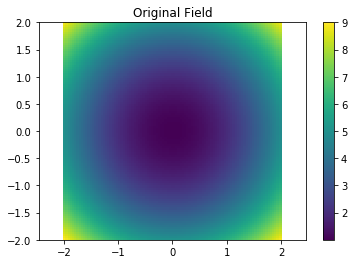

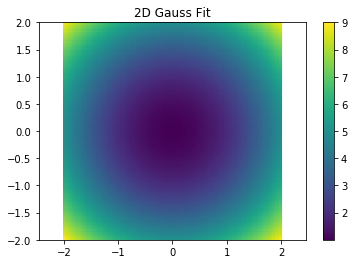

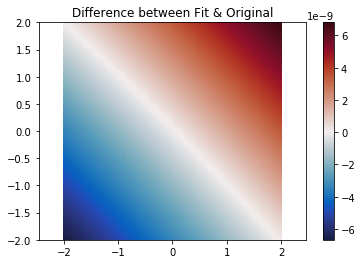

In [10]:
#iguess=[7,0.020202020202,0.020202020202,1,1,1]
fit=fit2Dcurve(var,x,y,amplitude, xo, yo,3,initial_guess=[1,1,1,1,1,1],date='',mode='parabolic',diagnostics=True)

In [11]:
#fit[0]=10
varista=twoD_Paraboloid(coords,*fit).reshape(100,100)
pcolormesh(varista)

TypeError: twoD_Paraboloid() missing 4 required positional arguments: 'yo', 'a', 'b', and 'offset'